Task 1: Familiarize with the dataset
Task 2: Load the dataset in a Jupyter Notebook
Task 3: Generate basic statistics and visualization
Task 4: Use the appropriate tests
Task 5: Share the jupyter notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url, index_col=0)

In [3]:
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25, 000 sq.ft
# INDUS - proportion of non-retail business acres per town
# CHAS - Charles River dummy variable 1  if track bounds river, 0 otherwise
# NOX - nitric oxides concentration
# RM - average # of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distance to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property tax rate per 10,000 dolars
# PTRATIO - pupill-teacher ration by town
# LSTAT - % lower status of the population
# MEDV - median value of owner-occypied homes in 1000$

Descriptive Statistics and Visualization
* For the MEDV provide a boxplot;
* Provide a barplot for the Charles River variable;
* Provide a boxplot for the MEDV variable and Age Variable - (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
* Provide a scatterplot to show the relationship between Nitric oxide concentration and the proportion of non-retail business across per town. What can you say about the relationship?
* Create a histogram for the pupil to teacher ratio variable

<AxesSubplot: xlabel='MEDV'>

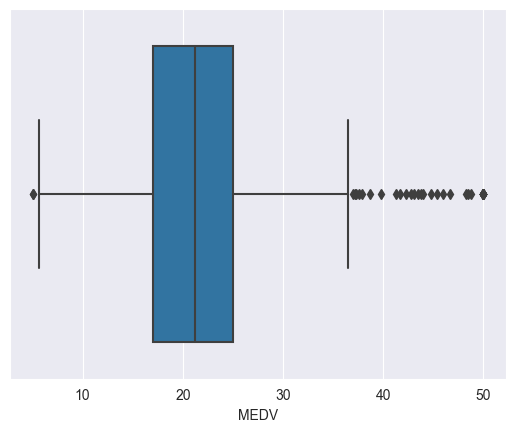

In [5]:
sns.boxplot(data=boston_df, x='MEDV')

The visualization of the boxplot for the MEDV variable shows extreme values after the maximum value. There seems to exist housing where the median value of owner occupied homes is higher. There also seem to exist housing with minimum values lower than the established minimum value. The mean will be affected by these extreme values.

<AxesSubplot: xlabel='CHAS', ylabel='count'>

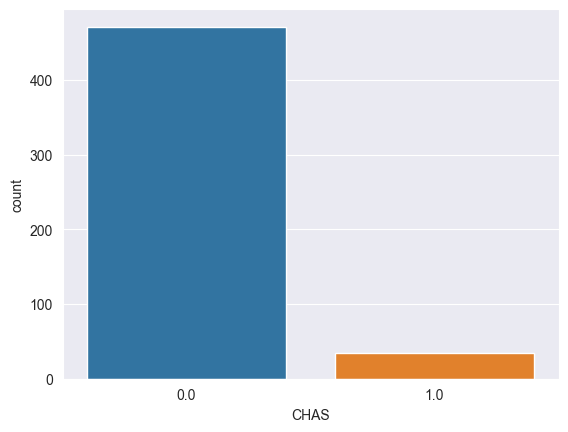

In [6]:
sns.countplot(data=boston_df, x='CHAS')

There seems to exist housing with no tracks bound river

In [7]:
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] > 70, 'AGE_GROUP'] = '70 years and older'

<AxesSubplot: xlabel='MEDV', ylabel='AGE_GROUP'>

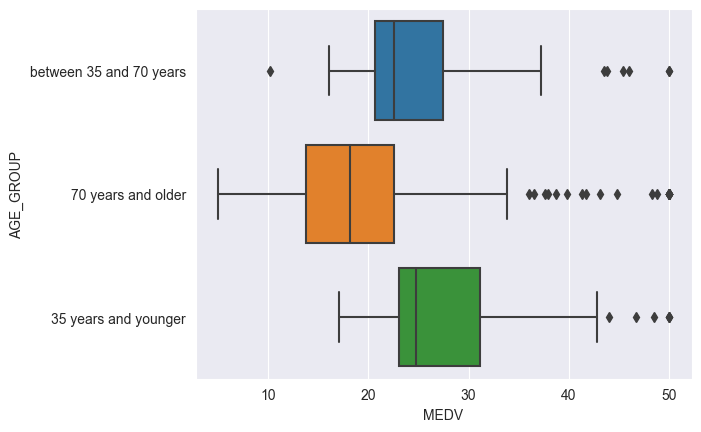

In [8]:
sns.boxplot(data=boston_df, x='MEDV', y='AGE_GROUP')

The median value of owner occupied homes is higher on the age group of 35 years and older. While the lower median value of owner occupied homes belongs to the group of 70 years and older.

<AxesSubplot: xlabel='NOX', ylabel='INDUS'>

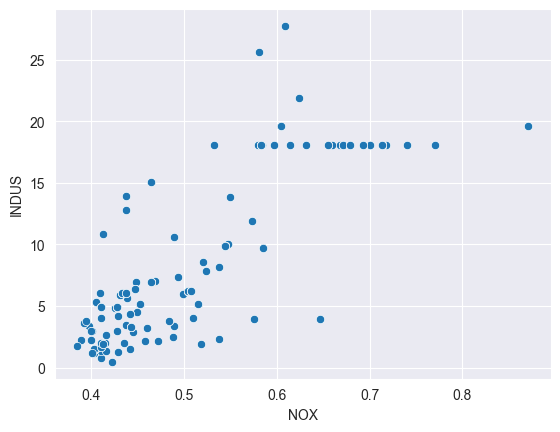

In [9]:
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')

There seems to exist a high concentration of INDUX when there is a small proportion of non-retail business acres per town
Also it seems a constant concentration when the NOX concentration reaches between levels between 0.6 and 0.7

<AxesSubplot: xlabel='PTRATIO', ylabel='Count'>

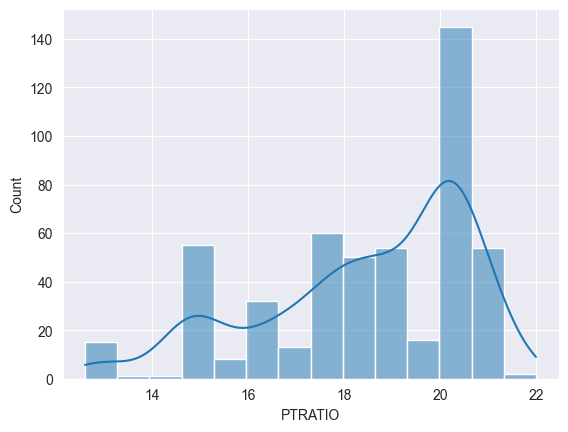

In [11]:
sns.histplot(data=boston_df, x='PTRATIO', kde=True)

The pupil to teacher ratio variable does not follow a normal distribution, noting a higher ratio around the values of 2o, followed by 21 and 17.

Questions to answer:
* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [18]:
import scipy.stats as scipy
import statsmodels.api as sm

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
H_0: There is not a significant difference in the median value of houses
H_1: There is a significant difference in the median value of houses

In [19]:
CHAS_1 = boston_df[boston_df['CHAS'] == 1.0]['MEDV']
CHAS_0 = boston_df[boston_df['CHAS'] == 0.0]['MEDV']

scipy.levene(CHAS_0, CHAS_1, center='mean')

# Observations:
# Since p-value is lower than the alpha value (0.05), we can conclude that there is not equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [20]:
scipy.ttest_ind(CHAS_0, CHAS_1, equal_var=True)

# Observations:
# Since the p-value is lower than the alpha-value, we reject the null hypothesis since there is statistically evidence claiming that there is a significant difference in the median value of houses.

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
H_0: There is not a difference in the Median values of house for each proportion of owner occupied units built prior to 1940
H_1: There is a difference in the Median values of house for each proportion of owner occupied units built prior to 1940

In [23]:
# Checking for variance equality
boston_df['AGE_GROUP'].value_counts()

seventy_years_and_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']
between_thirtyfive_seventy_years = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
thirtyfive_and_younder = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']

scipy.levene(seventy_years_and_older, between_thirtyfive_seventy_years, thirtyfive_and_younder, center='mean')

# Observations:
# Since the p-value is higher than the alpha-value (0.05), we can verify the equality of variances

LeveneResult(statistic=2.78062002937483, pvalue=0.06295337343259205)

In [24]:
f_statistics, p_value = scipy.f_oneway(seventy_years_and_older, between_thirtyfive_seventy_years, thirtyfive_and_younder)
f_statistics, p_value

# Observations:
# Since the p-value is lower than the alpha value, we reject the null hypothesis since there is statistically evidence that there is a difference in the median values for each proportion of owner occupied units built prior to 1940

(36.40764999196599, 1.7105011022702984e-15)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
H_0: There is a relationship between Nitric oxide concentration and proportion of non-retail business acres per town
H_1: There is no relationship [...]

<AxesSubplot: xlabel='NOX', ylabel='INDUS'>

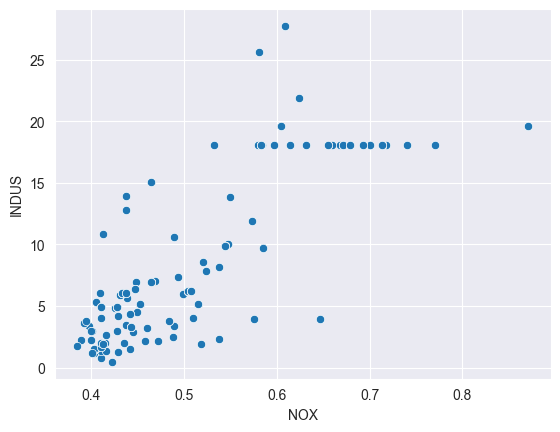

In [25]:
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')

In [26]:
scipy.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Observations:
# Since the p-value is less than the alpha value, we reject the null hypothesis since there is statistical evidence that there is a relationship between NOX and INDUS

PearsonRResult(statistic=0.7636514469209158, pvalue=7.913361061232845e-98)

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
H_0: There is no impact between DIS AND MEDV
H_1: There is impact between DIS and MEDV

In [28]:
X = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

# Observations:

# Since p-value is lower than 0.05, we reject the null hypothesis since there is a statistical evidence that there is impact between DIS and MEDV

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):                   1.52e-146
Time:                        17:23:46   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""